In [4]:
## 5. Data Understanding

### 5.1 Descrisão dos Dados

In [1]:
#Set pandas options
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
#Check the features datatypes and change it as needed
df = pd.read_csv('dados_iptu.csv')

#DataFrame informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40816178 entries, 0 to 40816177
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   contribuinte_n      object 
 1   CEP                 object 
 2   terreno_valorm2     float64
 3   construcao_valorm2  float64
 4   imovel_idade        float64
 5   propriedade_tipo    object 
 6   iptu_ano            int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ GB


In [3]:
#Define function to change datatypes and speed up the following processes
def transform_dtype(data):
     #Readequar colunas com seus respectivos tipos de dados para aumento de performance -> 90% de diminuição no tamanho do dataframe
        data['imovel_idade'] = data['imovel_idade'].apply(pd.to_numeric).astype('int16')
        data['iptu_ano'] = data['iptu_ano'].apply(pd.to_numeric).astype('int16')
        data['terreno_valorm2'] = data['terreno_valorm2'].apply(pd.to_numeric).astype('float32')
        data['construcao_valorm2'] = data['construcao_valorm2'].apply(pd.to_numeric).astype('float32')
        data['propriedade_tipo'] = data['propriedade_tipo'].astype('category')
        data["CEP"] = data["CEP"].astype('category')
        data["contribuinte_n"] = data["contribuinte_n"].astype('category')

        return data

#Redefinir variáveis para economia de memória
df = transform_dtype(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40816178 entries, 0 to 40816177
Data columns (total 7 columns):
 #   Column              Dtype   
---  ------              -----   
 0   contribuinte_n      category
 1   CEP                 category
 2   terreno_valorm2     float32 
 3   construcao_valorm2  float32 
 4   imovel_idade        int16   
 5   propriedade_tipo    category
 6   iptu_ano            int16   
dtypes: category(3), float32(2), int16(2)
memory usage: 976.4 MB


In [4]:
#How many rows, colunms
df.shape

(40816178, 7)

In [5]:
#Como são os dados
df.head()

,contribuinte_n,CEP,terreno_valorm2,construcao_valorm2,imovel_idade,propriedade_tipo,iptu_ano
0,0010030001-4,01104-001,100.41,129.07,1924,comercial horizontal - Padro B,1995
1,0010030002-2,01104-001,100.41,93.88,1944,comercial horizontal - Padro A,1995
2,0010030003-0,01104-001,100.41,93.88,1944,comercial horizontal - Padro A,1995
3,0010030004-9,01104-001,100.41,129.07,1944,comercial horizontal - Padro B,1995
4,0010030005-7,01104-001,100.41,93.88,1944,comercial horizontal - Padro A,1995


#### Executive Summary
Variáveis         | Explicação
:-----------------|:-------------:
contribuinte_n    | Número único da licença do imóvel 
CEP               | Código postal do imóvel
terreno_valorm2   | Valor por metro quadrado do terreno medido pela prefeitura
construcao_valorm2| Valor por metro quadrado do imóvel medido pela prefeitura
imovel_idade      | Ano de conclusão do empreendimento
propriedade_tipo  | Tipo de imóvel + Padrões de construção
iptu_ano          | Ano do recolhimento do IPTU

### 5.2 Exploração dos dados

In [6]:
#Resumo Estatístico das features numericas
df.describe()

,terreno_valorm2,construcao_valorm2,imovel_idade,iptu_ano
count,40816178.00,40816178.00,40816178.00,40816178.00
mean,858.75,764.11,1891.41,2009.02
std,1572.70,638.93,416.29,8.01
min,1.55,0.00,0.00,1995.00
25%,116.00,322.66,1970.00,2003.00
50%,352.63,560.00,1982.00,2009.00
75%,928.00,990.00,1993.00,2017.00
max,28815.00,4249.00,2020.00,2021.00


Na média, os valores dos terrenos são mais caros do que os valores das construções, o que indica uma favorecimento a tese de que a localização é o mais importante na compra de um imóvel. O desvio padrão mais elevado no valor dos terrenos demonstra que o investidor deve ter mais cautela quanto a localização em relação a conservação do empreendimento na hora de comprar seu imóvel. Importante mencionar que em todas as colunas, exceto no iptu_ano, existem valores anomalos. Como valores anomalos, no valor por m2 tanto dos terreno como das construcoes observamos valores próximos de 0 reais. No ano de construção dos imoveis, tambem observamos valores próximos de 0 d.c.

In [8]:
df.describe(include='category')

,contribuinte_n,CEP,propriedade_tipo
count,40816178,40816178,40816178
unique,3754173,47481,54
top,0010030001-4,00000-000,residncia vertical - Padro C
freq,14,65708,7534226


In [ ]:
df.median(skipna=True)

Utilizando a mediana, operação estatística menos sensível a valores anomalos se observa que os valores de construções são mais relevantes do que os valores dos terrenos contrariando a conclusão com base na média. Portanto, sendo tambem sensato ao investidor observar as condições dos imóveis para estimar o valor total a ser pago pelo empreendimento. Outro ponto importante é que mais de 75% dos imóveis amostrados possuem menos de 40 anos de idade.

In [11]:
#Variação da média nos preços de construção e valor dos terrenos ao longo do tempo
print(df.groupby('iptu_ano').median())

          terreno_valorm2  construcao_valorm2  imovel_idade
iptu_ano                                                   
1995                49.73              179.52       1974.00
1997                86.01              254.81       1976.00
1999                92.49              273.32       1978.00
2001                98.79              289.82       1979.00
2003               180.85              374.50       1980.00
2005               212.09              434.77       1981.00
2007               228.82              472.89       1981.00
2009               254.43              521.30       1982.00
2011               373.00              669.00       1983.00
2013               418.00              750.00       1983.00
2015               814.00             1070.00       1984.00
2017               950.00             1241.00       1985.00
2019              1016.00             1322.00       1986.00
2021              1045.00             1368.00       1987.00


Uma afirmação recorrente no mercado de capitais é que como os imóveis são ativos reais, eles automáticamente no longo prazo protegem o investidor contra a inflação, mas será que essa afirmação realmente é verdade para todos os imóveis na região metropolitana de São Paulo.

Com base nos resultados acima, podemos observar que em 20 anos ocorreu um aumento em média de 2.100% nos valores dos terrenos em São Paulo. No mesmo período, os valores dos imóveis multiplicaram por 7.6x em média. A inflação acumulada desde o início do plano real foi de 524,88%. Ou seja, imóveis em sua maioria protegem contra a inflação.

In [140]:
#Somar valores do terreno + construcao para obter valor do imóvel
df['imovel_valorm2'] = df['terreno_valorm2'] + df['construcao_valorm2']

#Filtrar os valores de 1995 e 2021
df_1995 = df.loc[ df['iptu_ano'] == 1995 , ['CEP', 'contribuinte_n', 'imovel_valorm2'] ].rename(columns={'imovel_valorm2': 'imovelvalor_1995'}).copy()
df_2021 = df.loc[ df['iptu_ano'] == 2021 , ['CEP', 'contribuinte_n', 'imovel_valorm2'] ].rename(columns={'imovel_valorm2': 'imovelvalor_2021'}).copy()

#Juntar valores com base em seu número de contribuinte
df_imovel = pd.concat([df_1995.set_index(df_1995['contribuinte_n']),df_2021.set_index(df_2021['contribuinte_n'])], axis = 1, join='inner').iloc[:, [0,2,5]]
df_imovel.index.name = None

#Qual a imóvel menos valorizou e mais valorizou entre 1995 e 2021?
df_imovel['valorizacao_porcentagem'] = ((df_imovel['imovelvalor_2021'] - df_imovel['imovelvalor_1995'])/df_imovel['imovelvalor_1995'])*100
df_imovel.describe()

,imovelvalor_1995,imovelvalor_2021,valorizacao_porcentagem
count,2135420.00,2135420.00,2135420.00
mean,321.35,3315.98,1472.85
std,389.54,2916.14,3042.82
min,1.55,48.00,-73.71
25%,145.83,1393.00,796.13
50%,228.89,2346.00,934.05
75%,377.54,4406.00,1122.29
max,5243.77,33064.00,76320.66


Em um estudo mais aprofundado e individual, podemos perceber que 75% dos imóveis valorizaram mais do que 790% em 22 anos, ou seja, batendo a inflação com tranquilidade. A mediana de valorização dos imóveis de São Paulo foi de aproximadamente 1000% em 22 anos. Isso significa que existiria uma boa chance de que seu patrimonio teria evoluido em mais de 10x em 22 anos. 

In [82]:
mask = df_imovel['valorizacao_porcentagem'] > 524.88
acima_inflacao = 100*(df_imovel.loc[mask].size/df_imovel.size)
print('Em {:.2f} % dos casos os imóveis na região metropolitana de São Paulo protegeram contra a inflação em 22 anos'.format(acima_inflacao))

Em 97.76 % dos casos os imóveis na região metropolitana de São Paulo protegeram contra a inflação em 22 anos


Mas quais foram os bairros de são paulo onde os imóveis mais se valorizaram? Aqui vamos explorar como os imóveis localizados em regiões premiums, ou primárias foram em relação ao restante da RMSP.

In [ ]:
import numpy as np

#Download dos ceps de regiões primárias
ceps_bairros = pd.read_excel('ceps.xlsx', 'bairros').dropna()
ceps_ruas = pd.read_excel('ceps.xlsx', 'ruas')

#Produzindo um novo banco de dados com todos os valores de cep para cada um dos bairros em ceps_bairros
cep_bairros = pd.DataFrame(columns={'CEP','localidade'})
i = 0

for localidade in ceps_bairros['Bairro']:
    ceps = pd.Series(np.arange(ceps_bairros.iloc[i, 1], ceps_bairros.iloc[i, 2]))
    bairro = [localidade] * len(ceps)
    cep_bairros = pd.concat([cep_bairros, pd.DataFrame(data={'CEP': ceps, 'localidade' : bairro})], ignore_index=True)
    i += 1

#Alterações no formato do CEP e de seu tipo 
df_imovel['CEP'] = df_imovel['CEP'].apply(lambda x: x.lstrip('0').replace('-','')).astype('int32')

#Adicionar coluna localidade com a 'label' dos bairros e ruas nobres
df_localidade = pd.merge(df_imovel,cep_bairros, on='CEP', how='left')
df_localidade = pd.merge(df_localidade,ceps_ruas, on='CEP', how='left')
df_localidade['localidade'].fillna('outros', inplace=True)
df_localidade['Rua'].fillna(df_localidade['localidade'], inplace=True)

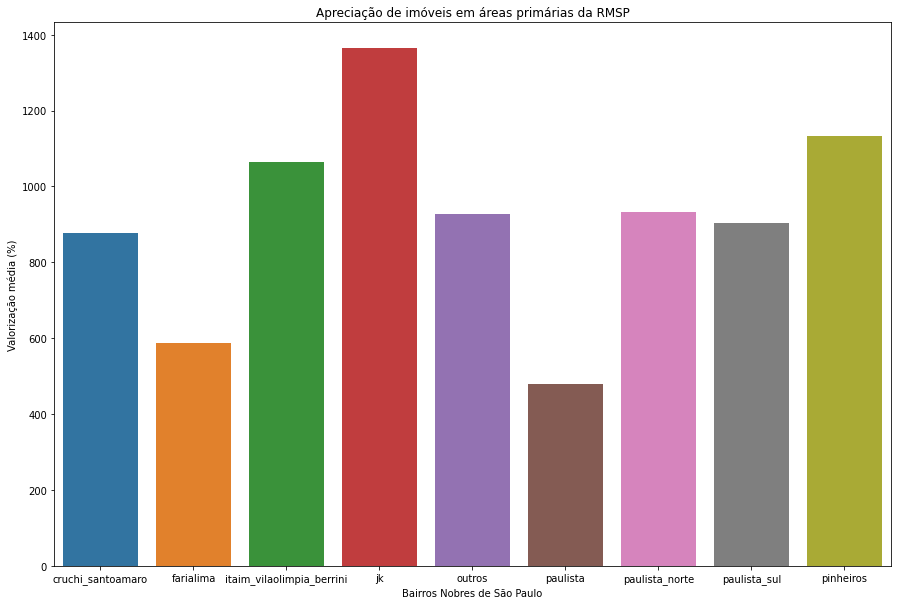

In [150]:
#Plotar valores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.barplot(data = df_localidade.groupby('Rua').median().reset_index(), x='Rua', y='valorizacao_porcentagem')
plt.xlabel('Bairros Nobres de São Paulo')
plt.ylabel('Valorização (%)')
plt.title('Apreciação de imóveis em áreas primárias da RMSP')
plt.show()

### 5.3 Verificação dos Dados

In [ ]:
#Variável Imóvel_idade
df["imovel_idade"].sort_values() #Valores menores do que 1880 começam a ser muito questionáveis, pois a construção mais antiga de são paulo ainda em pé é de 1880. 

In [ ]:
df[df["imovel_idade"] < 1880].count() #Existem 1883708 registros com idades incorretas de imóveis -> cerca de 4.6% dos dados.....